In [2]:
%pip install pandas numpy matplotlib seaborn openpyxl

Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --- ------------------------------------ 0.8/8.1 MB 4.5 MB/s eta 0:00:02
   ------- -------------------------------- 1.6/8.1 MB 4.1 MB/s eta 0:00:02
   ----------- ---------------------------- 2.4/8.1 MB 4.0 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.1 MB 4.2 MB/s eta 0:00:02
   --------------------- ------------------ 4.5/8.1 MB 4.4 MB/s eta 0:00:01
   --------------------------- ------------ 5.5/8.1 MB 4.5 MB/s eta 0:00:01
   ------------------------------ --------- 6.3/8.1 MB 4.4 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 4.3 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 4.3 MB/s eta 0:00:01
   -------------------------------------


[notice] A new release of pip is available: 25.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


        source    mean  median
0  Iteration 2  48.275  46.375
1  Iteration 3  33.300  33.000


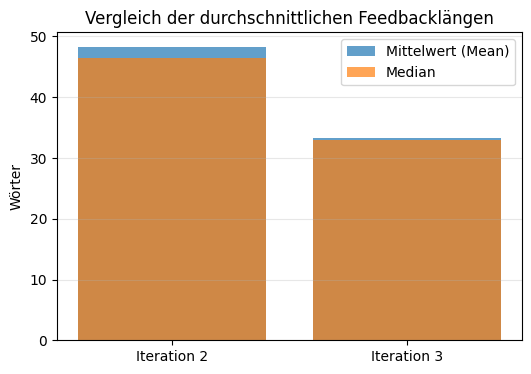

In [4]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# === Pfade zu deinen beiden JSON-Dateien anpassen ===
FILE_1 = Path("C:\\Users\\Marius\\Desktop\\Dev\\CodePilot\\app\\evaluation\\results\\secondIteration\\notion_output_word_stats.json")
FILE_2 = Path("C:\\Users\\Marius\\Desktop\\Dev\\CodePilot\\app\\evaluation\\results\\thirdIteration\\notion_output_word_stats_3.json")

# === JSONs einlesen ===
def load_json(path):
    with open(path, "r", encoding="utf-8") as f:
        return json.load(f)

data1 = load_json(FILE_1)
data2 = load_json(FILE_2)

# === In DataFrames umwandeln ===
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# === Namen geben (für die Legende) ===
df1["source"] = "Iteration 2"
df2["source"] = "Iteration 3"

# === Kombinieren ===
df_all = pd.concat([df1, df2], ignore_index=True)

# === Mittelwert der Means und Medians pro Quelle berechnen ===
summary = df_all.groupby("source")[["mean", "median"]].mean().reset_index()

print(summary)

# === Plot ===
plt.figure(figsize=(6,4))
plt.bar(summary["source"], summary["mean"], label="Mittelwert (Mean)", alpha=0.7)
plt.bar(summary["source"], summary["median"], label="Median", alpha=0.7)

plt.ylabel("Wörter")
plt.title("Vergleich der durchschnittlichen Feedbacklängen")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.show()


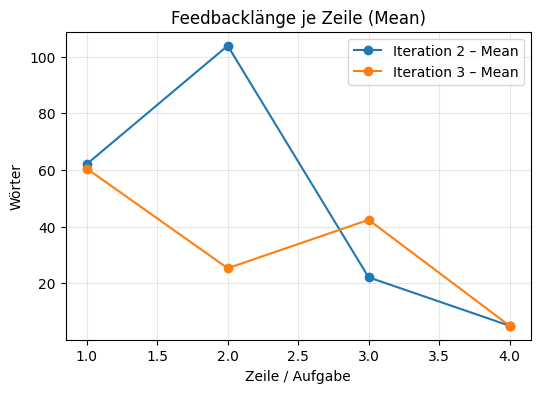

In [7]:
plt.figure(figsize=(6,4))
plt.plot(df1["row"], df1["mean"], "o-", label="Iteration 2 – Mean")
plt.plot(df2["row"], df2["mean"], "o-", label="Iteration 3 – Mean")
plt.xlabel("Zeile / Aufgabe")
plt.ylabel("Wörter")
plt.title("Feedbacklänge je Zeile (Mean)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


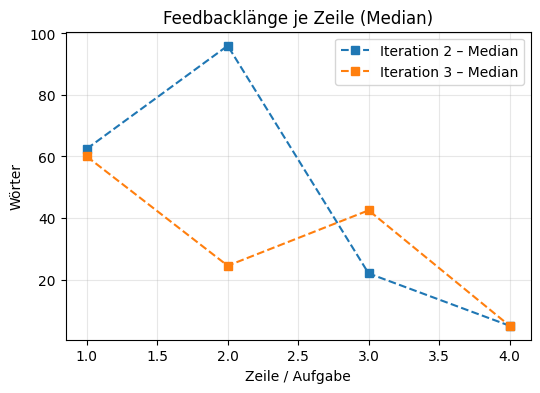

In [8]:
plt.figure(figsize=(6,4))
plt.plot(df1["row"], df1["median"], "s--", label="Iteration 2 – Median")
plt.plot(df2["row"], df2["median"], "s--", label="Iteration 3 – Median")
plt.xlabel("Zeile / Aufgabe")
plt.ylabel("Wörter")
plt.title("Feedbacklänge je Zeile (Median)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()


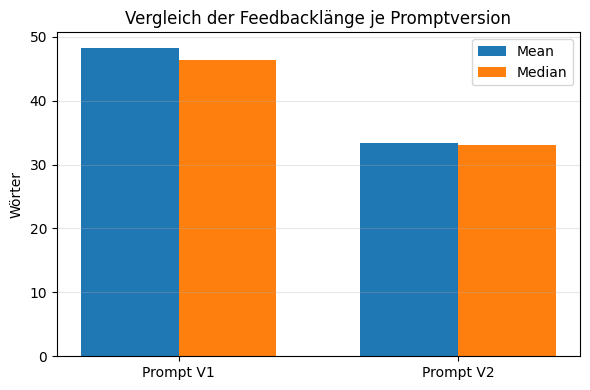

In [9]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# === Pfade zu deinen JSON-Dateien ===
FILE_OLD = "C:\\Users\\Marius\\Desktop\\Dev\\CodePilot\\app\\evaluation\\results\\secondIteration\\notion_output_word_stats.json"
FILE_NEW = "C:\\Users\\Marius\\Desktop\\Dev\\CodePilot\\app\\evaluation\\results\\thirdIteration\\notion_output_word_stats_3.json"

def load_data(path, label):
    with open(path, "r", encoding="utf-8") as f:
        data = json.load(f)
    df = pd.DataFrame(data)
    df["version"] = label
    return df

df1 = load_data(FILE_OLD, "Prompt V1")
df2 = load_data(FILE_NEW, "Prompt V2")

df_all = pd.concat([df1, df2])

# Durchschnittliche Werte je Version
summary = df_all.groupby("version")[["mean", "median"]].mean().reset_index()

# Plot
x = np.arange(len(summary))
w = 0.35
plt.figure(figsize=(6,4))
plt.bar(x - w/2, summary["mean"], w, label="Mean")
plt.bar(x + w/2, summary["median"], w, label="Median")
plt.xticks(x, summary["version"])
plt.ylabel("Wörter")
plt.title("Vergleich der Feedbacklänge je Promptversion")
plt.legend()
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


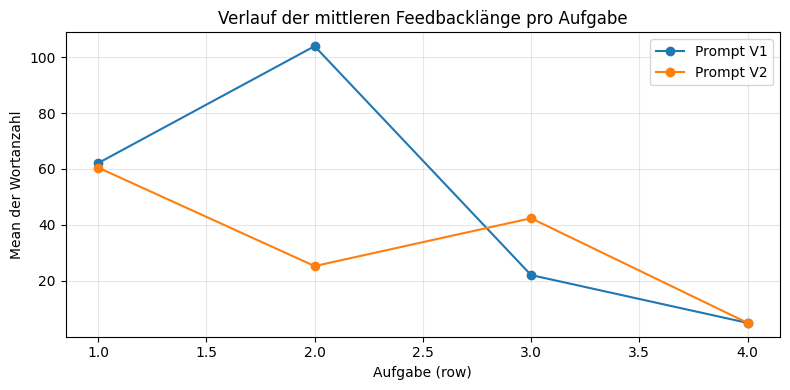

In [10]:
plt.figure(figsize=(8,4))
plt.plot(df1["row"], df1["mean"], "-o", label="Prompt V1")
plt.plot(df2["row"], df2["mean"], "-o", label="Prompt V2")

plt.xlabel("Aufgabe (row)")
plt.ylabel("Mean der Wortanzahl")
plt.title("Verlauf der mittleren Feedbacklänge pro Aufgabe")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


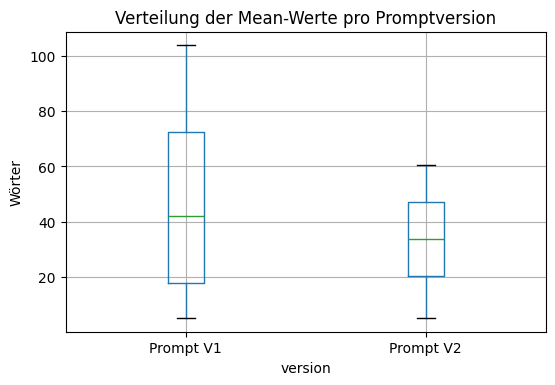

In [11]:
df_all.boxplot(column="mean", by="version", figsize=(6,4))
plt.suptitle("")
plt.title("Verteilung der Mean-Werte pro Promptversion")
plt.ylabel("Wörter")
plt.show()


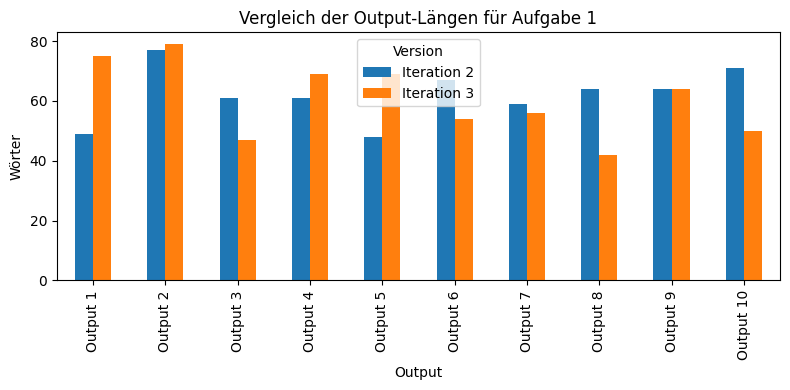

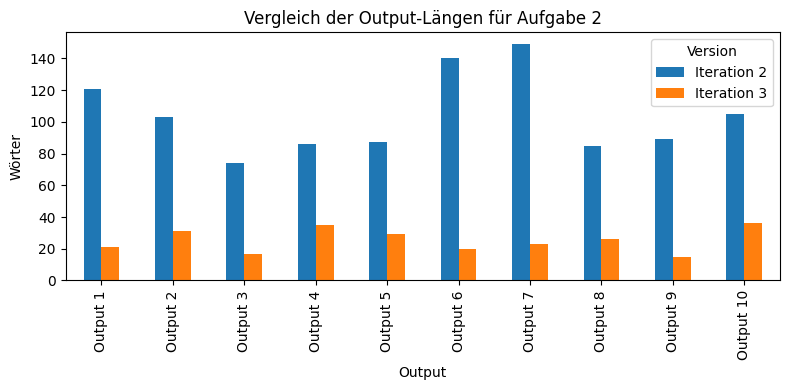

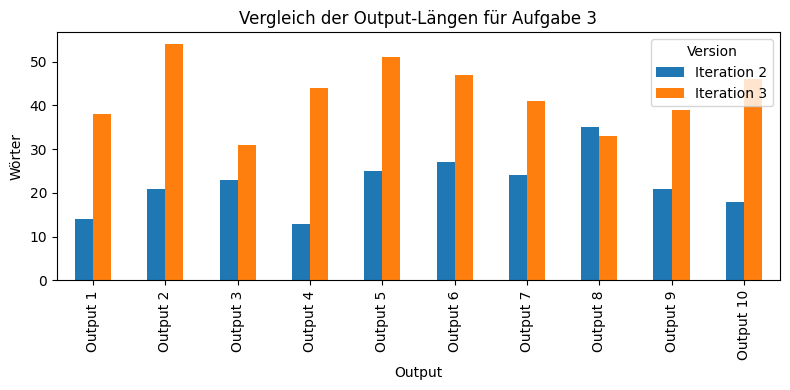

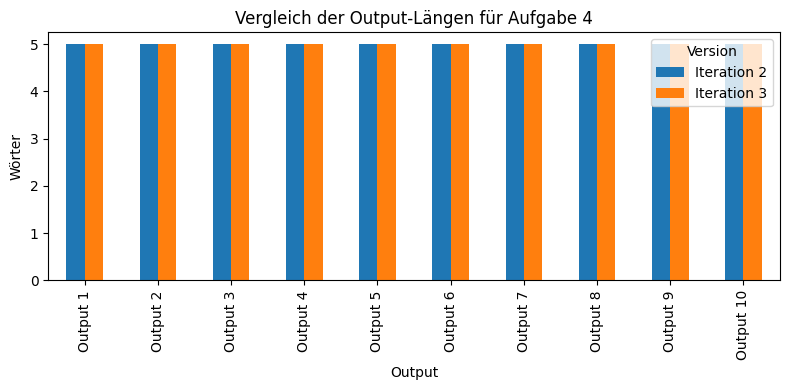

In [13]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# === Dateien laden ===
FILE_OLD = "C:\\Users\\Marius\\Desktop\\Dev\\CodePilot\\app\\evaluation\\results\\secondIteration\\notion_output_word_stats.json"
FILE_NEW = "C:\\Users\\Marius\\Desktop\\Dev\\CodePilot\\app\\evaluation\\results\\thirdIteration\\notion_output_word_stats_3.json"

def load_json(path, label):
    with open(path, "r", encoding="utf-8") as f:
        data = json.load(f)
    df = pd.DataFrame(data)
    df["version"] = label
    return df

df1 = load_json(FILE_OLD, "Iteration 2")
df2 = load_json(FILE_NEW, "Iteration 3")

# Beide zusammenführen
df_all = pd.concat([df1, df2], ignore_index=True)

# === Einzelne Outputs vergleichen ===
for row in sorted(df_all["row"].unique()):
    # Daten für diese Row
    subset = df_all[df_all["row"] == row]
    # in DataFrame-Form bringen
    outputs_df = pd.DataFrame(subset["outputs"].tolist(), index=subset["version"])
    outputs_df = outputs_df.T  # Transponieren: Outputs = Zeilen

    # Plot
    outputs_df.plot(kind="bar", figsize=(8,4))
    plt.title(f"Vergleich der Output-Längen für Aufgabe {row}")
    plt.ylabel("Wörter")
    plt.xlabel("Output")
    plt.legend(title="Version")
    plt.tight_layout()
    plt.show()
